In [383]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency

df = pd.read_csv('/Users/garvert/Documents/Alena/RCT/rct-data/rct-2022-11/merged.csv', delimiter=',', error_bad_lines=False)

print('Age:')
t, p = stats.ttest_ind(df['age'][df['group'] == 'Waitlist'], df['age'][df['group'] == 'Intervention'])
print('Intervention mean, std: ', df['age'][df['group'] == 'Intervention'].mean(), df['age'][df['group'] == 'Intervention'].std())
print('Waitlist mean, std: ', df['age'][df['group'] == 'Waitlist'].mean(), df['age'][df['group'] == 'Waitlist'].std())
print('t: ',t, ' p: ',p, '\n')

print('Ethnicity:')
observations = pd.crosstab(index=df["eth_original"], columns=df["group"],margins=False)
chi2, p, dof, ex = chi2_contingency(observations)
print(observations)
print("chi2 = ", chi2)
print("p = ", p)


print('\n\nEmployment:')
observations = pd.crosstab(index=df["employ_original"], columns=df["group"],margins=False)
chi2, p, dof, ex = chi2_contingency(observations)
print(observations)
print("chi2 = ", chi2)
print("p = ", p)


print('\n\Education:')
observations = pd.crosstab(index=df["edu_original"], columns=df["group"],margins=False)
chi2, p, dof, ex = chi2_contingency(observations)
print(observations)
print("chi2 = ", chi2)
print("p = ", p)


print('\n\Previous app use:')
observations = pd.crosstab(index=df["apps_original"], columns=df["group"],margins=False)
chi2, p, dof, ex = chi2_contingency(observations)
print(observations)
print("chi2 = ", chi2)
print("p = ", p)



Age:
Intervention mean, std:  29.076923076923077 4.100914072406411
Waitlist mean, std:  27.46 4.607934594207019
t:  -1.8737644492930094  p:  0.0638826018839124 

Ethnicity:
group                         Intervention  Waitlist
eth_original                                        
Asian/Asian British                      1         3
Black/Black British                      2         2
Mixed/Multiple ethnic groups             6         2
White/White British                     43        43
chi2 =  2.9619230769230773
p =  0.39753322332500296


Employment:
group                                               Intervention  Waitlist
employ_original                                                           
Student                                                        5         7
Temporarily away from work due to illness, mate...             2         0
Unable to work due to disability or any other r...             1         1
Unemployed                                                     2    

/var/folders/jr/vpz3bd1119zgz0p25m86p7580000gn/T/ipykernel_8359/1096194834.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/Users/garvert/Documents/Alena/RCT/rct-data/rct-2022-11/merged.csv', delimiter=',', error_bad_lines=False)


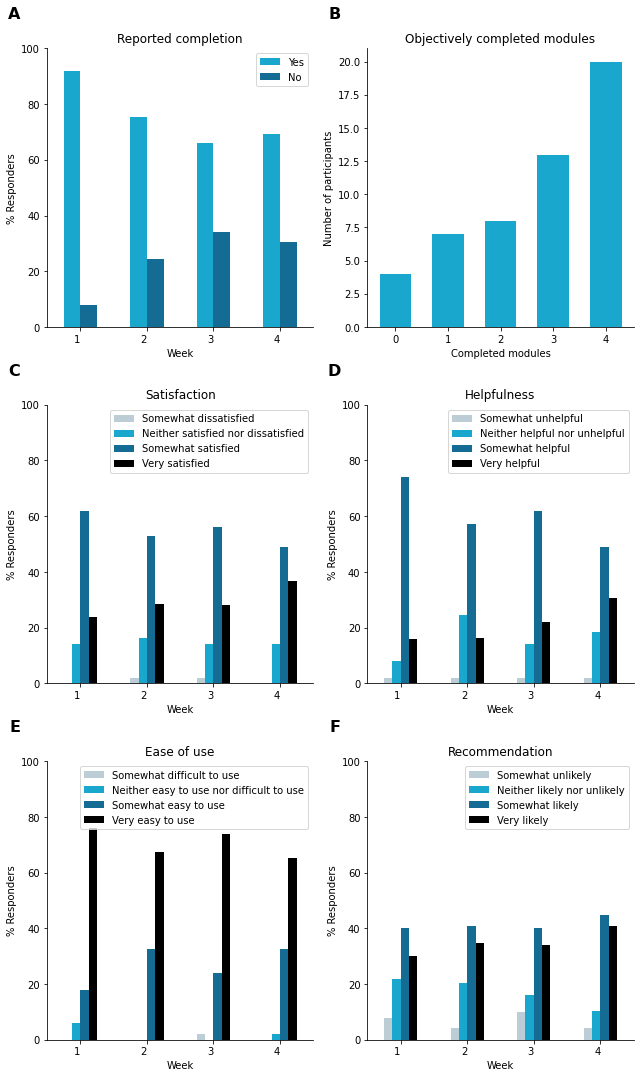

In [384]:
# Acceptability data
import statsmodels.api as sm
import statsmodels.formula.api as smf

df_int = df[df['group'] == 'Intervention']

title = 'Reported completion'
variables = ['end_original_w']
order = {'end_original_w': ['Yes','No']}

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(9,15))

vix = 'end_original_w'
satis = df_int[[vix+"1",vix+"2",vix+"3",vix+"4"]]
satis = pd.melt(satis, value_vars = [vix+"1",vix+"2",vix+"3",vix+"4"])
freq = pd.crosstab(satis.variable, satis.value, normalize='index')*100
freq = freq[order[vix]]

ax = fig.add_subplot(3,2,1)
ax.text(-0.1, 1.15, 'A', transform=ax.transAxes,
  fontsize=16, fontweight='bold', va='top', ha='right')

g = freq.plot(kind='bar', color=["#19A7CE","#146C94", "#000000"], ax = ax)
g.set(xticklabels = ['1','2','3','4'], ylim = (0,100), xlabel = 'Week', ylabel = '% Responders', title = title)
plt.xticks(rotation=360, ha='right')
ax.spines[['right', 'top']].set_visible(False)
ax.legend(loc=0, title='')

satis = df_int[['M0M1complete','M2complete',	'M3complete',	'M4complete']]
df = satis.mean(axis = 1)*4

ax = fig.add_subplot(3,2,2)
df.plot.hist(bins = [-0.3,0.3,0.7,1.3,1.7,2.3,2.7,3.3,3.7,4.3], color = ["#19A7CE"])
ax.set_xlabel('Completed modules')
ax.set_ylabel('Number of participants')
ax.set_title('Objectively completed modules')
ax.spines[['right', 'top']].set_visible(False)
ax.text(-0.1, 1.15, 'B', transform=ax.transAxes,
  fontsize=16, fontweight='bold', va='top', ha='right')



title = ['Satisfaction', 'Helpfulness', 'Ease of use', 'Recommendation', 'Completion']
variables = ['satis_original_w', 'help_original_w','easy_original_w','recc_original_w', 'end_original_w']

order = {'satis_original_w': ['Somewhat dissatisfied','Neither satisfied nor dissatisfied','Somewhat satisfied','Very satisfied'],
'help_original_w': ['Somewhat unhelpful','Neither helpful nor unhelpful','Somewhat helpful','Very helpful'],
'recc_original_w': ['Somewhat unlikely','Neither likely nor unlikely','Somewhat likely','Very likely'],
'easy_original_w': ['Somewhat difficult to use','Neither easy to use nor difficult to use','Somewhat easy to use','Very easy to use'],
'end_original_w': ['Yes','No']}

import matplotlib.pyplot as plt

for i, label in enumerate(('C', 'D', 'E', 'F')):
    vix = variables[i]
    satis = df_int[[vix+"1",vix+"2",vix+"3",vix+"4"]]
    satis = pd.melt(satis, value_vars = [vix+"1",vix+"2",vix+"3",vix+"4"])
    freq = pd.crosstab(satis.variable, satis.value, normalize='index')*100
    freq = freq[order[vix]]

    ax = fig.add_subplot(3,2,i+3)
    ax.text(-0.1, 1.15, label, transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')

    g = freq.plot(kind='bar', color=["#BDCDD6", "#19A7CE","#146C94", "#000000"], ax = ax)
    g.set(xticklabels = ['1','2','3','4'], ylim = (0,100), xlabel = 'Week', ylabel = '% Responders', title = title[i])
    plt.xticks(rotation=360, ha='right')
    ax.spines[['right', 'top']].set_visible(False)
    ax.legend(loc=0, title='')

plt.tight_layout()
    
plt.show()

/var/folders/jr/vpz3bd1119zgz0p25m86p7580000gn/T/ipykernel_8359/2072294917.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/Users/garvert/Documents/Alena/RCT/rct-data/rct-2022-11/merged.csv', delimiter=',', error_bad_lines=False)
/var/folders/jr/vpz3bd1119zgz0p25m86p7580000gn/T/ipykernel_8359/2072294917.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set(xticklabels = ['0','1','2','3','4',"6"], ylim = (25,50), xlabel = 'Week')
/var/folders/jr/vpz3bd1119zgz0p25m86p7580000gn/T/ipykernel_8359/2072294917.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set(xticklabels = ['0','1','2','3','4',"6"], ylim = (0,25), xlabel = 'Week')


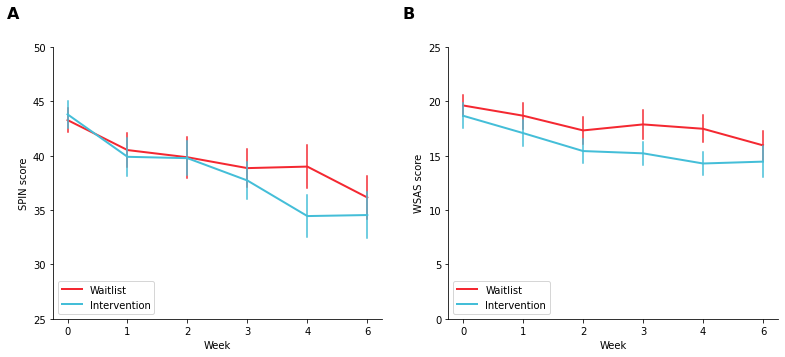

In [385]:

df = pd.read_csv('/Users/garvert/Documents/Alena/RCT/rct-data/rct-2022-11/merged.csv', delimiter=',', error_bad_lines=False)

spin = df[["spintot_0","spintot_w1","spintot_w2","spintot_w3","spintot_w4","spintot_w6","group"]]
spin_melted = spin.melt(id_vars = 'group', var_name="timepoint", value_name="SPIN score")

wsas = df[["wsastot_0","wsastot_w1","wsastot_w2","wsastot_w3","wsastot_w4","wsastot_w6","group"]]
wsas_melted = wsas.melt(id_vars = 'group', var_name="timepoint", value_name="WSAS score")

fig = plt.figure(figsize=(13,5))
for i, label in enumerate(('A', 'B')):
    ax = fig.add_subplot(1,2,i+1)
    ax.text(-0.1, 1.15, label, transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
    
    if i == 0:
        g = sns.lineplot(data=spin_melted, x = 'timepoint', y = 'SPIN score', hue = 'group', 
                        err_style="bars", errorbar=("se"), palette=["#f42831", "#44bed8"], linewidth=2, ax = ax)
        ax.legend(labels=["Waitlist","Intervention"], loc = 3)
        g.set(xticklabels = ['0','1','2','3','4',"6"], ylim = (25,50), xlabel = 'Week')
        ax.spines[['right', 'top']].set_visible(False)

    else:
        g = sns.lineplot(data=wsas_melted, x = 'timepoint', y = 'WSAS score', hue = 'group', 
                        err_style="bars", errorbar=("se"), palette=["#f42831", "#44bed8"], linewidth=2, ax = ax)
        g.set(xticklabels = ['0','1','2','3','4',"6"], ylim = (0,25), xlabel = 'Week')
        ax.spines[['right', 'top']].set_visible(False)
        ax.legend(labels=["Waitlist","Intervention"], loc = 3)


plt.savefig('waitlist_intervention.png', dpi=300)
plt.show()

     spintot_0  spintot_w1  spintot_w2  spintot_w3  spintot_w4  spintot_w6  \
0           48        44.0        33.0        28.0        34.0        29.0   
2           46        56.0        51.0        51.0        54.0        40.0   
4           39        43.0        58.0        53.0        56.0        52.0   
6           34        41.0        43.0        40.0        41.0        31.0   
8           59        61.0        60.0        60.0        62.0        62.0   
..         ...         ...         ...         ...         ...         ...   
95          45        41.0        35.0        27.0        26.0        21.0   
96          38        33.0        30.0        32.0        31.0         NaN   
97          46        40.0        39.0        41.0         NaN         NaN   
98          39        46.0        40.0        45.0        31.0        30.0   
100         39        28.0        33.0        31.0        29.0        30.0   

            group  
0        Waitlist  
2        Waitlist  
4  

/var/folders/jr/vpz3bd1119zgz0p25m86p7580000gn/T/ipykernel_8359/181580208.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set(xticklabels = ['0','1','2','3','4',"6"], ylim = (25,50), xlabel = 'Week')
/var/folders/jr/vpz3bd1119zgz0p25m86p7580000gn/T/ipykernel_8359/181580208.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set(xticklabels = ['0','1','2','3','4',"6"], ylim = (0,25), xlabel = 'Week')


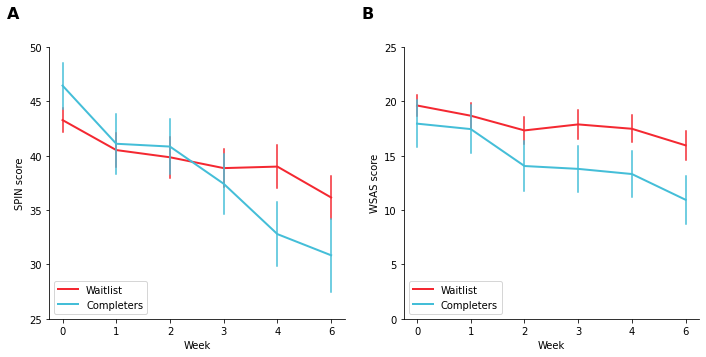

In [386]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

df = df.drop(df[df.completed== 0].index)
df.head()

spin = df[["spintot_0","spintot_w1","spintot_w2","spintot_w3","spintot_w4","spintot_w6","group"]]
spin_melted = spin.melt(id_vars = 'group', var_name="timepoint", value_name="SPIN score")
print(spin)

wsas = df[["wsastot_0","wsastot_w1","wsastot_w2","wsastot_w3","wsastot_w4","wsastot_w6","group"]]
wsas_melted = wsas.melt(id_vars = 'group', var_name="timepoint", value_name="WSAS score")

fig = plt.figure(figsize=(18,5))

for i, label in enumerate(('A', 'B')):
    ax = fig.add_subplot(1,3,i+2)
    ax.text(-0.1, 1.15, label, transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
    
    if i == 0:
        g = sns.lineplot(data=spin_melted, x = 'timepoint', y = 'SPIN score', hue = 'group', 
                        err_style="bars", errorbar=("se"), palette=["#f42831", "#44bed8"], linewidth=2, ax = ax)
        ax.legend(labels=["Waitlist","Completers"], loc = 3)
        g.set(xticklabels = ['0','1','2','3','4',"6"], ylim = (25,50), xlabel = 'Week')
        ax.spines[['right', 'top']].set_visible(False)

    else:
        g = sns.lineplot(data=wsas_melted, x = 'timepoint', y = 'WSAS score', hue = 'group', 
                        err_style="bars", errorbar=("se"), palette=["#f42831", "#44bed8"], linewidth=2, ax = ax)
        g.set(xticklabels = ['0','1','2','3','4',"6"], ylim = (0,25), xlabel = 'Week')
        ax.spines[['right', 'top']].set_visible(False)
        ax.legend(labels=["Waitlist","Completers"], loc = 3)


plt.savefig('waitlist_completers.png', dpi=300)

plt.show()